## Jupyter Notebooks
These are interactive environments for running code and displaying results. They typically consist of cells where you can write Python code, markdown text, or other elements.
- Cell Execution: When you run a cell in a Jupyter Notebook (usually by pressing Shift+Enter), the contents of that cell are executed
- Exclamation Mark Prefix: If a cell starts with an exclamation mark, the entire content is treated as a command line command instead of Python code. This allows you to directly interact with the operating system from within your notebook

#### Python Installed and Tested
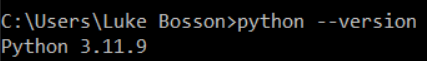
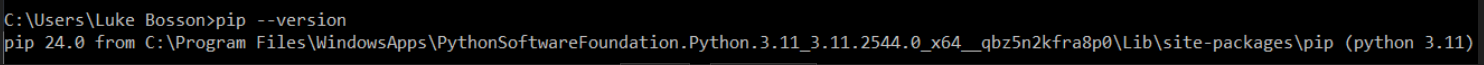

In [ ]:
# fetch python package libraries
# We import the pandas library (usually abbreviated as pd) to work with DataFrames, which are tabular data structures in Python.
!pip install pandas
!pip install openpyxl
!pip install zipfiles
!pip install kaggle

# import panda library
import pandas as pd

# import zipfile library (for extracting files from kaggle download)
import zipfile

# import kaggle library (for extracting file from kaggle download)
import kaggle

In [2]:
# download dataset from kaggle using API, The exclamation mark treats the following line as a "command line" command
!kaggle datasets download -d hmavrodiev/london-bike-sharing-dataset

Dataset URL: https://www.kaggle.com/datasets/hmavrodiev/london-bike-sharing-dataset
License(s): other
london-bike-sharing-dataset.zip: Skipping, found more recently modified local copy (use --force to force download)


In [3]:
# extract the file from the downloaded zip file
zipfile_name = 'london-bike-sharing-dataset.zip'
with zipfile.ZipFile(zipfile_name, 'r') as file:
    file.extractall()

In [4]:
# read the bike sharing data as a pandas dataframe
bikes = pd.read_csv("london_merged.csv")

In [5]:
# explore the data details
bikes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17414 entries, 0 to 17413
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   timestamp     17414 non-null  object 
 1   cnt           17414 non-null  int64  
 2   t1            17414 non-null  float64
 3   t2            17414 non-null  float64
 4   hum           17414 non-null  float64
 5   wind_speed    17414 non-null  float64
 6   weather_code  17414 non-null  float64
 7   is_holiday    17414 non-null  float64
 8   is_weekend    17414 non-null  float64
 9   season        17414 non-null  float64
dtypes: float64(8), int64(1), object(1)
memory usage: 1.3+ MB


In [6]:
# view data number of rows (entries) and columns (information)
bikes.shape

(17414, 10)

In [7]:
# view entire dataset
bikes

,timestamp,cnt,t1,t2,hum,wind_speed,weather_code,is_holiday,is_weekend,season
0,2015-01-04 00:00:00,182,3.0,2.0,93.0,6.0,3.0,0.0,1.0,3.0
1,2015-01-04 01:00:00,138,3.0,2.5,93.0,5.0,1.0,0.0,1.0,3.0
2,2015-01-04 02:00:00,134,2.5,2.5,96.5,0.0,1.0,0.0,1.0,3.0
3,2015-01-04 03:00:00,72,2.0,2.0,100.0,0.0,1.0,0.0,1.0,3.0
4,2015-01-04 04:00:00,47,2.0,0.0,93.0,6.5,1.0,0.0,1.0,3.0
...,...,...,...,...,...,...,...,...,...,...
17409,2017-01-03 19:00:00,1042,5.0,1.0,81.0,19.0,3.0,0.0,0.0,3.0
17410,2017-01-03 20:00:00,541,5.0,1.0,81.0,21.0,4.0,0.0,0.0,3.0
17411,2017-01-03 21:00:00,337,5.5,1.5,78.5,24.0,4.0,0.0,0.0,3.0
17412,2017-01-03 22:00:00,224,5.5,1.5,76.0,23.0,4.0,0.0,0.0,3.0


In [8]:
# count unique weather_code values, to see biking activity based on season
bikes.weather_code.value_counts()

weather_code
1.0     6150
2.0     4034
3.0     3551
7.0     2141
4.0     1464
26.0      60
10.0      14
Name: count, dtype: int64

In [9]:
# unique count of values in seasons column
bikes.season.value_counts()

season
0.0    4394
1.0    4387
3.0    4330
2.0    4303
Name: count, dtype: int64

In [10]:
# renaming columns to more interpretable names
new_cols_dict ={
	'timestamp':'time',
    'cnt':'count',
    't1': 'temp_real_c',
    't2': 'temp_feels_like_c',
    'hum': 'humidity_percent',
    'wind_speed': 'wind_speed_kph',
    'weather_code': 'weather',
    'is_holiday': 'is_holiday',
    'is_weekend': 'is_weekend',
    'season': 'season'
}

# update column names in bikes dataset, 
# Where axis=1 means refer to cols (not rows) and inplace=True means modify bikes dataframe instead of making a new one
bikes.rename(new_cols_dict, axis=1, inplace=True)

In [11]:
# convert humidity values to percentages (i.e. values between 0 and 1)
bikes.humidity_percent = bikes.humidity_percent / 100

In [12]:
# update the dictionaries for columns season and also winter so that the integers are mapped to written information
# in this case we're using dictionaries to change row values

season_dict = {
    '0.0':'spring',
    '1.0':'summer',
    '2.0':'autumn',
    '3.0':'winter'
}

weather_dict = {
    '1.0':'Clear',
    '2.0':'Scattered clouds',
    '3.0':'Broken clouds',
    '4.0':'Cloudy',
    '7.0':'Rain',
    '10.0':'Rain with thunderstorm',
    '26.0':'Snowfall',
    '94.0':'Freezing Fog'
}

# changing bikes season column to string
bikes.season = bikes.season.astype('str')
# mapping values 0-3 to the actual written values
bikes.season = bikes.season.map(season_dict)

# change weather column to data type string
bikes.weather = bikes.weather.astype('str')
# map the values to the actual written weather values
bikes.weather = bikes.weather.map(weather_dict)

In [13]:
# lets double check dataframe 'bikes' to see it updated correctly
bikes.head()

,time,count,temp_real_c,temp_feels_like_c,humidity_percent,wind_speed_kph,weather,is_holiday,is_weekend,season
0,2015-01-04 00:00:00,182,3.0,2.0,0.930,6.0,Broken clouds,0.0,1.0,winter
1,2015-01-04 01:00:00,138,3.0,2.5,0.930,5.0,Clear,0.0,1.0,winter
2,2015-01-04 02:00:00,134,2.5,2.5,0.965,0.0,Clear,0.0,1.0,winter
3,2015-01-04 03:00:00,72,2.0,2.0,1.000,0.0,Clear,0.0,1.0,winter
4,2015-01-04 04:00:00,47,2.0,0.0,0.930,6.5,Clear,0.0,1.0,winter


In [38]:
# the dataframe is complete and to be exported to an excel file that will be uploaded to tableau & powerbi with file name 'london_bikes_final.xlsx' and sheet tab name 'data'
bikes.to_excel('london_bikes_final.xlsx', sheet_name='Data')